# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [169]:
library('tidyverse')
library('readxl')
library('scales')
library('ggrepel')

In [2]:
df_tuition = read_excel('us_avg_tuition.xlsx')
df_tuition|> head()

State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,5682.838,5840.550,5753.496,6008.169,6475.092,7188.954,8071.134,8451.902,9098.069,9358.929,9496.084,9751.101
Alaska,4328.281,4632.623,4918.501,5069.822,5075.482,5454.607,5759.153,5762.421,6026.143,6012.445,6148.808,6571.340
Arizona,5138.495,5415.516,5481.419,5681.638,6058.464,7263.204,8839.605,9966.716,10133.503,10296.200,10413.844,10646.278
Arkansas,5772.302,6082.379,6231.977,6414.900,6416.503,6627.092,6900.912,7028.991,7286.580,7408.495,7606.410,7867.297
California,5285.921,5527.881,5334.826,5672.472,5897.888,7258.771,8193.739,9436.426,9360.574,9274.193,9186.824,9269.844
Colorado,4703.777,5406.967,5596.348,6227.002,6284.137,6948.473,7748.201,8315.632,8792.856,9292.954,9298.599,9748.188


In [101]:
tuition_long = df_tuition |>
    pivot_longer(cols=c('2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11',
                    '2011-12','2012-13','2013-14','2014-15','2015-16'),names_to='Year',values_to= 'AvgTuition')
tuition_long |> head()

State,Year,AvgTuition
<chr>,<chr>,<dbl>
Alabama,2004-05,5682.838
Alabama,2005-06,5840.550
Alabama,2006-07,5753.496
Alabama,2007-08,6008.169
Alabama,2008-09,6475.092
Alabama,2009-10,7188.954


In [83]:
Year1516top10 = tuition_long |>
    filter(Year=='2015-16') |>
    slice_max(AvgTuition, n=10) |>
    mutate(State=State|>fct_infreq()) |>
    pull(State) 
Year1516top10

[1] New Hampshire  Vermont        Pennsylvania   New Jersey     Illinois      
 [6] Michigan       Virginia       South Carolina Delaware       Massachusetts 
10 Levels: Delaware Illinois Massachusetts Michigan ... Virginia

In [181]:
top10tuition = tuition_long |>
    filter(Year=='2015-16',State%in%Year1516top10) |>
    arrange(AvgTuition) |>
    mutate(State_sorted=fct_inorder(State))

top10tuition 

State,Year,AvgTuition,State_sorted
<chr>,<chr>,<dbl>,<fct>
Massachusetts,2015-16,11588.13,Massachusetts
Delaware,2015-16,11676.22,Delaware
South Carolina,2015-16,11816.03,South Carolina
Virginia,2015-16,11818.69,Virginia
Michigan,2015-16,11990.53,Michigan
Illinois,2015-16,13189.10,Illinois
New Jersey,2015-16,13303.42,New Jersey
Pennsylvania,2015-16,13394.78,Pennsylvania
Vermont,2015-16,14993.03,Vermont


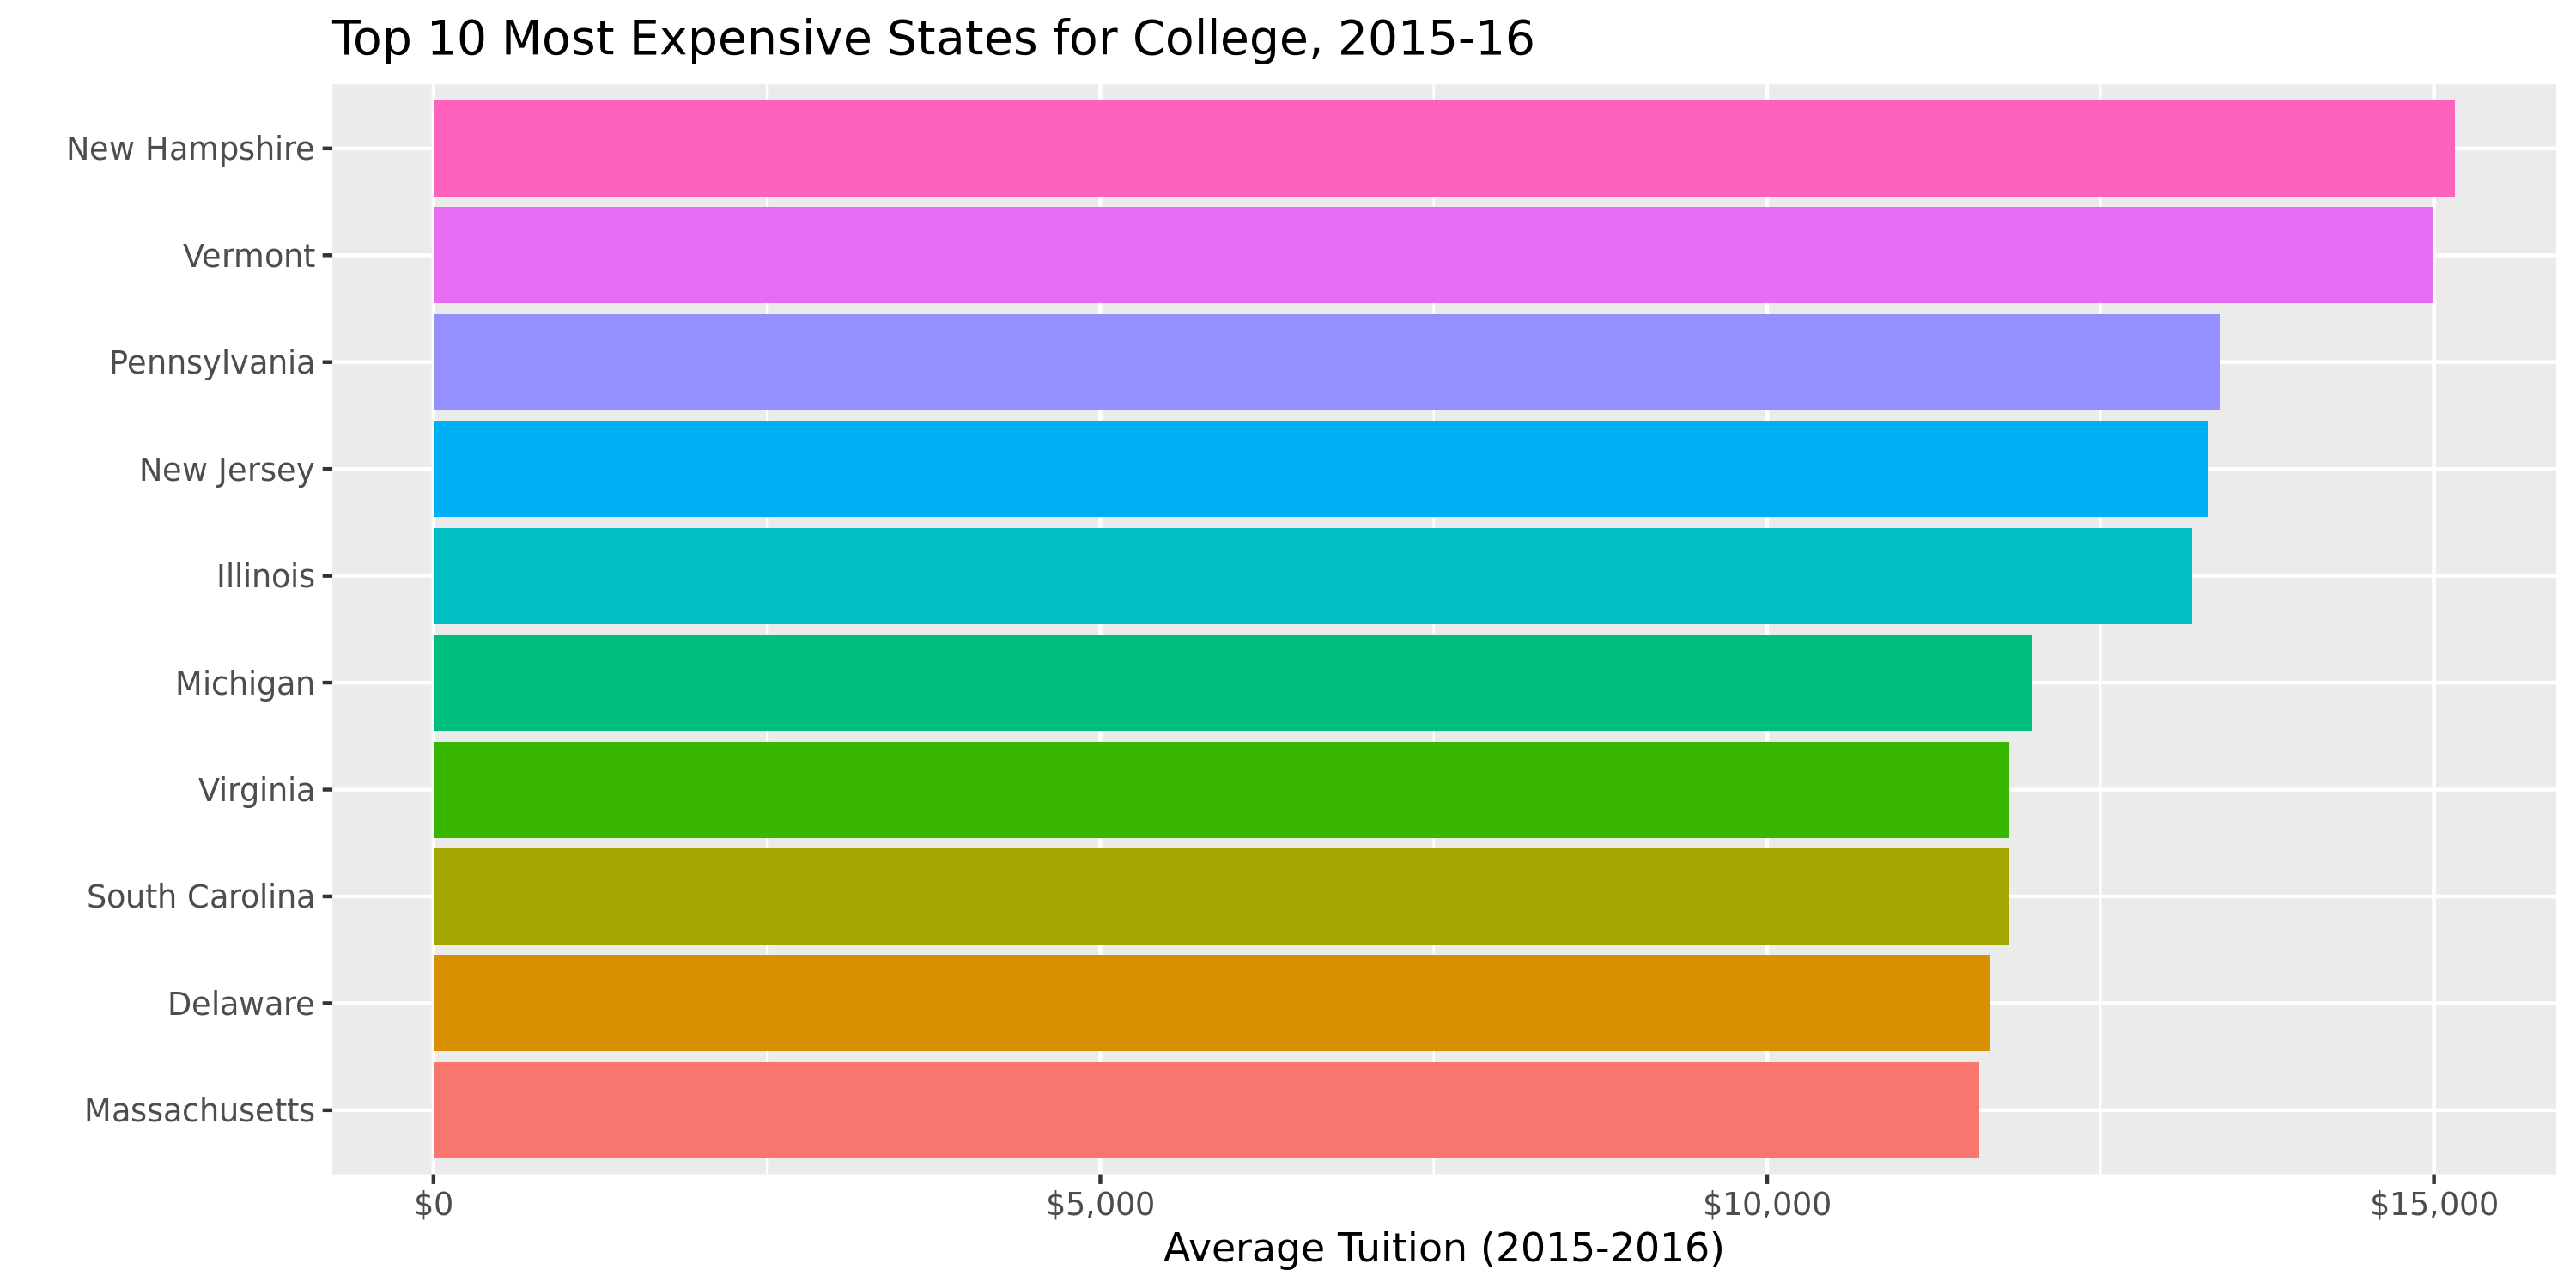

In [182]:
options(repr.plot.res=300,repr.plot.width=10,repr.plot.height=5)
ggplot(top10tuition,aes(y=State_sorted,x=AvgTuition, fill=State_sorted)) +
    geom_col(show.legend=FALSE) +
    labs(x='Average Tuition (2015-2016)',y='',title='Top 10 Most Expensive States for College, 2015-16') +
    scale_x_continuous(labels=dollar)

In [186]:
top10tuitionall = tuition_long |>
    filter(State%in%Year1516top10) |>
    arrange(AvgTuition)

top10tuitionall |> head()

State,Year,AvgTuition
<chr>,<chr>,<dbl>
Virginia,2004-05,7029.835
Virginia,2005-06,7356.259
Virginia,2006-07,7688.529
Michigan,2004-05,7930.772
Virginia,2007-08,8029.223
Illinois,2004-05,8182.783


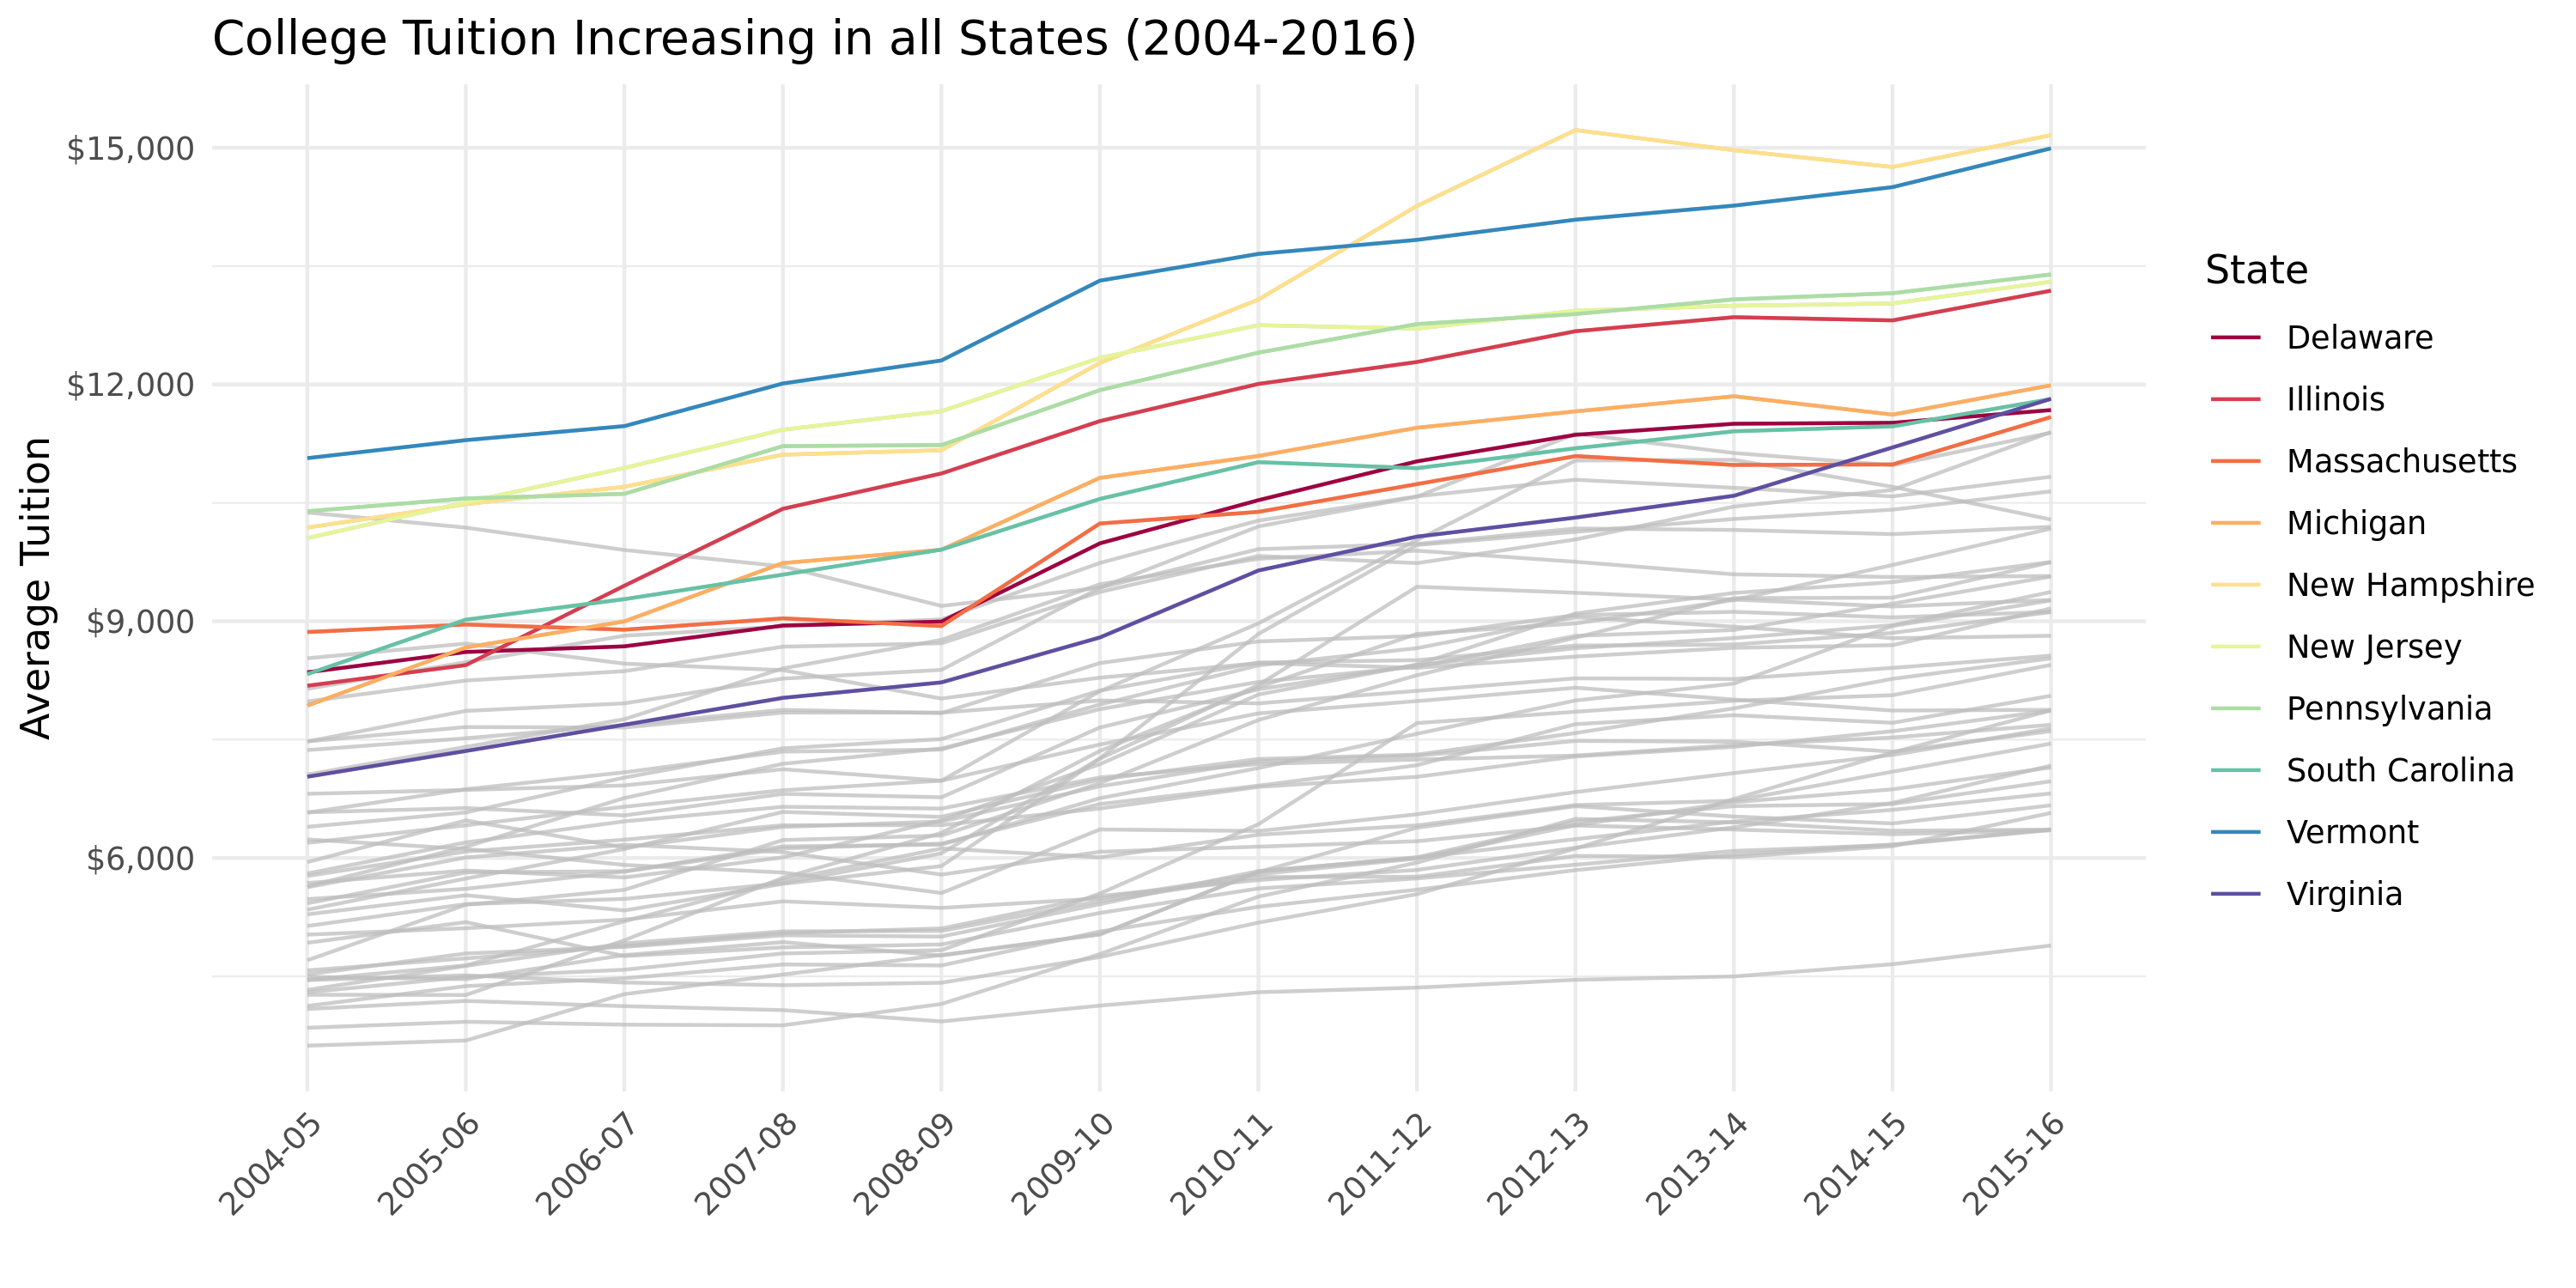

In [185]:
ggplot(tuition_long,aes(x=Year,y=AvgTuition, group=State))+
    geom_line(alpha=0.75,color='grey') + geom_line(data=top10tuitionall,aes(x=Year,y=AvgTuition,group=State,color=State)) +
scale_y_continuous(labels=dollar) +
    labs(x='',y='Average Tuition',title="College Tuition Increasing in all States (2004-2016)") +
theme_minimal()+
theme(axis.text.x = element_text(angle=45,hjust=1)) +
scale_color_brewer(palette='Spectral')

In [98]:
df_newhamp = tuition_long |>
filter(State=='New Hampshire')
df_newhamp |> head()

State,Year,AvgTuition
<chr>,<chr>,<dbl>
New Hampshire,2004-05,10187.53
New Hampshire,2005-06,10484.17
New Hampshire,2006-07,10703.66
New Hampshire,2007-08,11111.22
New Hampshire,2008-09,11167.58
New Hampshire,2009-10,12273.42


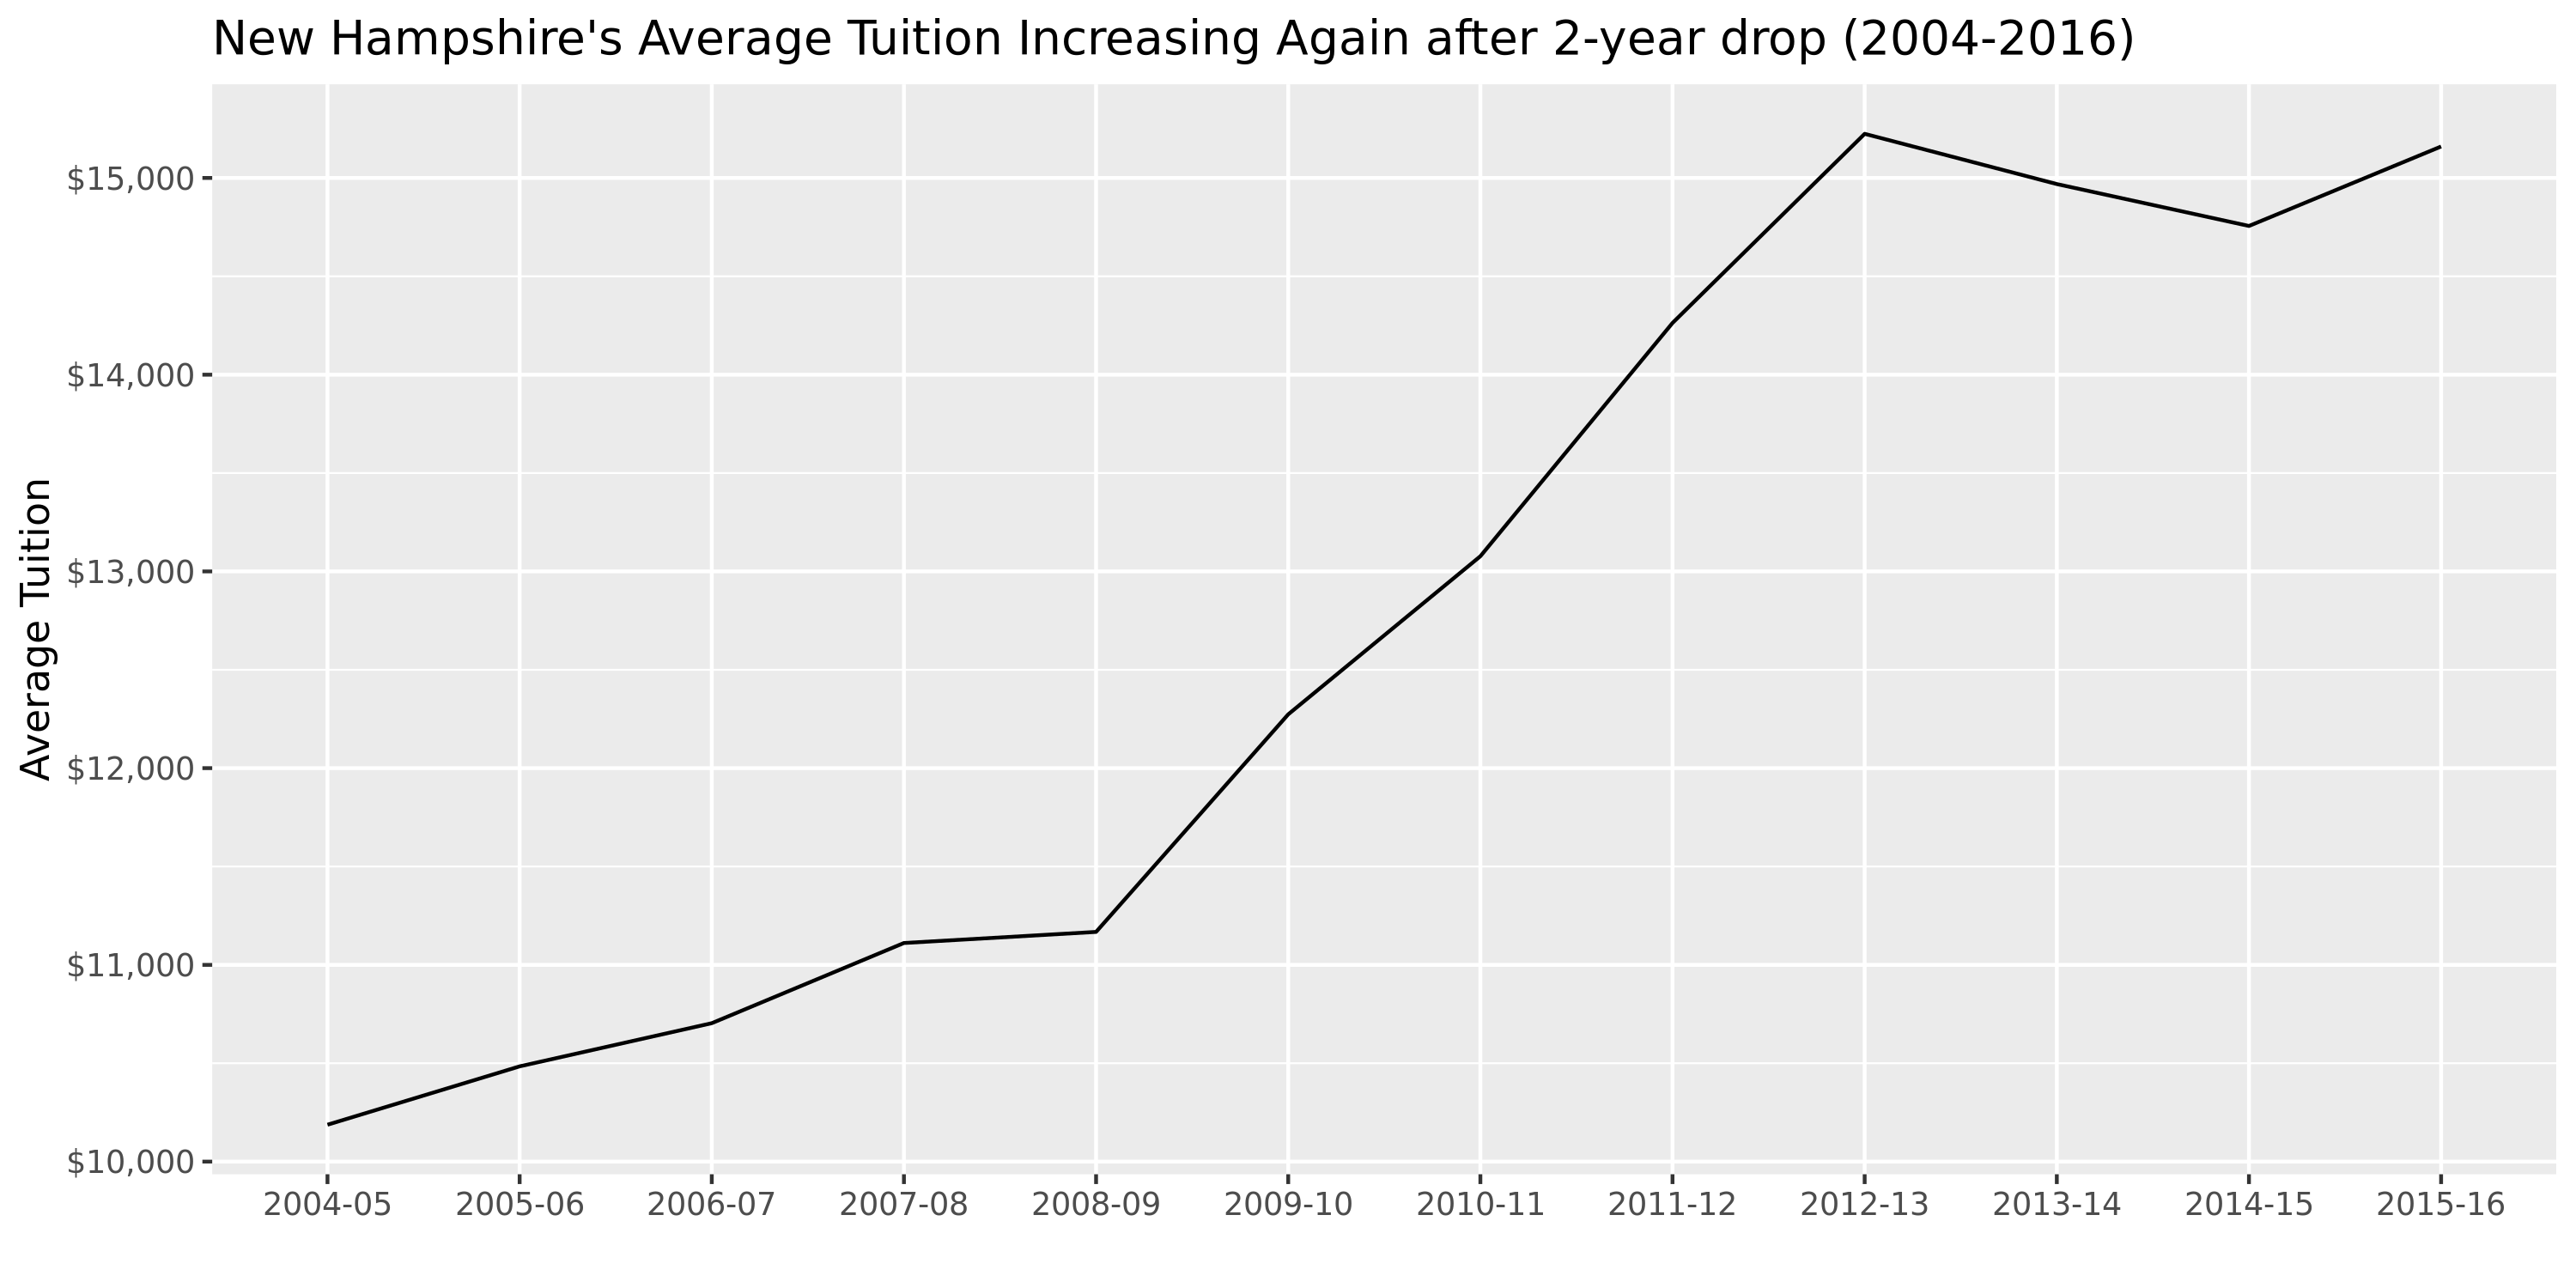

In [113]:
ggplot(df_newhamp,aes(x=Year,y=AvgTuition,group=State)) +
    geom_line() +
    scale_y_continuous(labels=dollar) +
    labs(x='',y='Average Tuition',title="New Hampshire's Average Tuition Increasing Again after 2-year drop (2004-2016)")

After importing the data from excel, I previewed the dataset, then converted it from a wide dataset to a long dataset using the pivot function. With a "Year" column created, I filtered the data to 2015-16 and used the slice_max function to find the top 10 states with the highest tuition from that year. Then using the fct_inorder function inside a mutate statement I ordered the top 10 states in descending order. Then I graphed the output and adjusted the aesthetics.
I created a new dataframe with the same 10 states but this time including all years, and plotted this data with colors on top of a line graph with all states to show the increase in tuition over time, adjusting the chart aesthetics as needed.

Lastly, I created a filtered dataframe that only contined data from New Hampshire (the state with the highest average tuition in 2015-16) and plotted this in a separate line chart, to show New Hampshire's unique tuition trend. I again adjusted chart aesthetics as needed.